# Programming Exercise 1: Linear Regression
## 1. Introduction
In this exercise, you will implement linear regression and get to see if work
on data.

In [1]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 2 Linear regression with one variable
Now you will implement linear regression with one variable to predict profits
for a food truck. Suppose you are the CEO of a restaurant franchise and are
considering different cities for opening a new outlet. The chain already has
trucks in various cities and you have data for profits and populations from the
cities. You would like to use this data to help you select which city to
expand to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem.
The first column is the population of a city (in 10,000s) and the second column
is the profit of a food truck in that city (in \$10,000s). A negative value for
profit indicates a loss.

### 2.1 Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). Many
other problems that you will encounter in real life are multi-dimensional
and cannot be plotted on a 2-D plot.

The dataset is loaded from the data file into the variables $X$ and $y$:

In [2]:
data = np.loadtxt("ex1data1.txt", dtype=float, delimiter=',')   # read comma separated data
X, y = data[:, 0], data[:, 1]
m = len(y)      # number of training examples

Now, you should to complete the `plotData` function below. Then run the defined
function with the loaded data to visualize it.

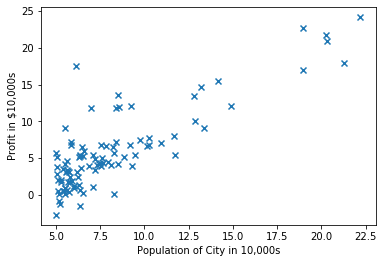

In [3]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data points
    and gives the figure axes labels of population and profit.

    Parameters
    ----------
    X : array_like
        Data point values for x-axis.
    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    """
    plt.scatter(X, y, marker='x', label='Training data')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

plotData(X, y)

### 2.2 Gradient Descent
In this part, you will fit the linear regression parameters $\theta$ to our
dataset using gradient descent.
#### 2.2.1 Update Equations
The objective of linear regression is to minimize the cost function

\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^m
\left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2
\end{equation}

where the hypothesis $h_{\theta}(x)$ is given by the linear model

\begin{equation}
h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x_1
\end{equation}

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is
to use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

\begin{equation}
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m
\left( h_{\theta}(x^{(i)}) - y^{(i)} \right)x_j^{(i)}
\quad \text{(simultaneously update $\theta_j$ for all $j$)}.
\end{equation}

With each step of gradient descent, your parameters $\theta_j$ come closer to
the optimal values that achieve the lowest cost $J(\theta)$.

#### 2.2.2 Implementation
We have already set up the data for linear regression. In the following cell,
we add another dimension to our data to accommodate the $\theta_0$ intercept
term. We also initialize the initial parameters to 0 and the learning rate
$\alpha$ to 0.01

In [4]:
X = np.c_[np.ones((m, 1)), data[:,0]]   # Add a column of ones to X
theta = np.zeros((2, 1))                # initialize fitting parameters

iterations = 1500
alpha = 0.01

#### 2.2.3 Computing the cost $J(\theta)$
As you perform gradient descent to learn minimize the cost function $J(\theta)$,
it is helpful to monitor the convergence by computing the cost. In this section,
you will implement a function to calculate $J(\theta)$ so you can check the
convergence of your gradient descent implementation.

Your next task is to complete the code for function `computeCost` which computes
$J(\theta)$. As you are doing this, remember that the variables $X$ and $y$
are not scalar values, but matrices whose rows represent the examples from the
training set.

In [5]:
def computeCost(X, y, theta):
    """
    Computes the cost of using theta as the parameter for linear regression to
    fit the data points in X and y.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m, n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already
        appended to the features so we have n + 1 columns.
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    theta : array_like
        The parameters for the regression function. This is a vector of
        shape (n+1, ).

    Returns
    -------
    J : float
        The value of the regression cost function.
    """
    # Initialize some useful values
    m = len(y)  # number of training examples
    J = 0    # you need to return the cost correctly
    for xi, yi in zip(X, y):
        J = J + np.square(float(np.dot(xi, theta)) - yi)
    return J / (2 * m)

Once you have completed the function, the next step will run `computeCost` two
times using two different initializations of $\theta$. You will see the cost
printed to the screen.

In [6]:
print('\nTesting the cost function ... \n')
# compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [0 ; 0], cost computed = ', J)
print('Expected cost value (approx) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, np.array([[-1], [2]]))
print('With theta = [-1 ; 2], cost computed = ', J)
print('Expected cost value (approx) 54.24\n')


Testing the cost function ... 

With theta = [0 ; 0], cost computed =  32.072733877455654
Expected cost value (approx) 32.07

With theta = [-1 ; 2], cost computed =  54.24245508201238
Expected cost value (approx) 54.24



#### 2.2.4 Gradient descent
Next, you will complete a function which implements gradient descent. As you
programming, keep in mind that the cost $J(\theta)$ is parameterized by the
vector $\theta$, not $X$ or $y$. That is, we minimize the value of $J(\theta)$
by changing the values of the vector $\theta$, not by changing $X$ or $y$.
Refer to the equations in this notebook and to the video lectures if you are
uncertain.

A good way to verify that gradient descent is working correctly is to look at
the values of $J(\theta)$ and check that it is decreasing with each step.
Assuming you have implemented gradient descent and `computeCost` correctly,
your value of $J(\theta)$ should never increase, and should converge to a
steady value by the end of the algorithm.

In [7]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking
    `num_iters` gradient steps with learning rate `alpha`.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m, n+1).
    y : array_like
        Value at given features. A vector of shape (m, ).
    theta : array_like
        Initial values for the linear regression parameters. A vector of
        shape (n+1, ).
    alpha : float
        The learning rate.
    num_iters : int
        The number of iterations for gradient descent.

    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    J_history : list
        A list for the values of the cost function after each iteration.
    """
    # Initialize some useful values
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        sum0, sum1 = 0, 0
        for j in range(m):
            sum0 = sum0 + (np.dot(X[j], theta) - y[j]) * X[j][0]
            sum1 = sum1 + (np.dot(X[j], theta) - y[j]) * X[j][1]
        theta[0] = theta[0] - alpha * sum0 / m
        theta[1] = theta[1] - alpha * sum1 / m

        # Save the cost J in every iteration
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

After you are finished, the next cell will use the final parameters to plot the
linear fit.

Running Gradient Descent ...

Theta found by gradient descent: θ0 = [-3.63029144] , θ1 = [1.16636235]
Expected theta values (approx): -3.6303  1.1664



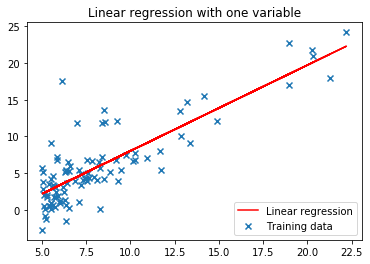

In [8]:
print('Running Gradient Descent ...\n')
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: θ0 =', theta[0], ', θ1 =', theta[1])
print('Expected theta values (approx): -3.6303  1.1664\n')

# Plot the linear fit
plt.scatter(X[:, 1], y, marker='x', label='Training data')
plt.plot(X[:, 1], np.dot(X, theta), color='r', label='Linear regression')
plt.legend(loc='lower right')
plt.title('Linear regression with one variable');

Your final values for $\theta$ will also be used to make predictions on profits
in areas of 35,000 and 70,000 people.

In [9]:
predict1 = np.dot([1, 3.5], theta)[0]
predict2 = np.dot([1, 7], theta)[0]
print('For population = 35,000, we predict a profit of {:.2f}'.format(predict1 * 10000))
print('For population = 70,000, we predict a profit of {:.2f}'.format(predict2 * 10000))

For population = 35,000, we predict a profit of 4519.77
For population = 70,000, we predict a profit of 45342.45


### 2.3 Visualizing $J(\theta)$
To understand the cost function $J(\theta)$ better, you will now plot the cost
over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values.


Visualizing J(theta_0, theta_1) ... 



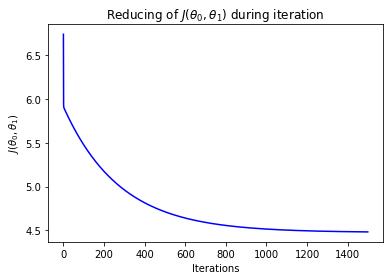

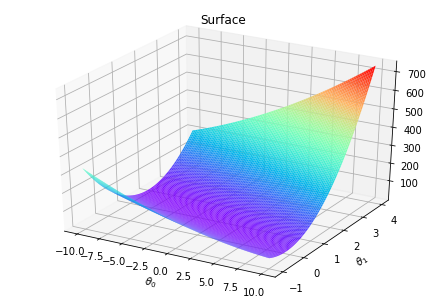

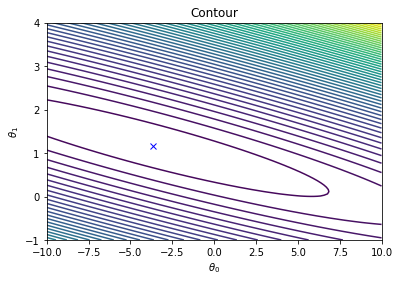

In [10]:
print('\nVisualizing J(theta_0, theta_1) ... \n')

# Plot the reducing of cost function during iteration
plt.plot(np.arange(iterations), J_history, 'b')
plt.xlabel('Iterations')
plt.ylabel(r'$J(\theta_0, \theta_1)$')
plt.title(r'Reducing of $J(\theta_0, \theta_1)$ during iteration')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros([len(theta0_vals), len(theta1_vals)])

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i][j] = computeCost(X, y, t)

x_contour, y_contour = theta0_vals, theta1_vals
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Produce surface and contour plots of J(θ)
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.plot_surface(theta0_vals, theta1_vals, J_vals.T, rstride=1, cstride=1, cmap=cm.rainbow)
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_title('Surface')

fig3, ax3 = plt.subplots()
CS = ax3.contour(theta0_vals, theta1_vals, J_vals.T, levels=50)
ax3.plot(theta[0], theta[1], 'bx')
ax3.set_xlabel(r'$\theta_0$')
ax3.set_ylabel(r'$\theta_1$')
ax3.set_title('Contour');

The purpose of these graphs is to show you that how $J(\theta)$ varies with
changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is
bowl-shaped and has a global minimum. (This is easier to see in the contour
plot than in the 3D surface plot). This minimum is the optimal point for
$\theta_0$ and $\theta_1$, and each step of gradient descent move closer to
this point.

## 3 Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose that you are selling your house and
you want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland,
Oregon. The first column is the size of the house (in square feet), the second
column is the number of bedrooms, and the third column is the price of the
house.

### 3.1 Feature Normalization
We start by loading and displaying some values from this dataset. By looking at
the values, note that house sizes are about 1000 times the number of bedrooms.
When features differ by orders of magnitude, first performing feature scaling
can make gradient descent converge much more quickly.

In [11]:
# Load data
data2 = np.loadtxt('ex1data2.txt', dtype=float, delimiter=',')
X, y = data2[:, 0:2], data2[:, 2:3]
m = len(y)

Your task here is to complete the code in function `featureNormalize`:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values
  by their respective "standard deviations".

The standard deviation is a way of measuring how much variation there is in the
range of values of a particular feature (most data points will lie with ±2
standard deviations of the mean); this is an alternative to taking the range
of values (max - min). 

You will do this for all the features and your code should work with datasets
of all sizes (any number of features/examples). Note that each column of the
matrix $X$ corresponds to one feature.

In [12]:
def featureNormalize(X):
    """
    Normalizes the features in X. Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m, n).

    Returns
    -------
    X_norm : array_like
    The normalized dataset of shape (m, n).
    """
    mean = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_norm = (X - mean) / sigma

    return X_norm

Execute the next cell to run the implemented `featureNormalize` function.

In [13]:
# Scale features and set them to zero mean
X_norm = featureNormalize(X)
y_norm = featureNormalize(y)

After the `featureNormalize` function is tested, we now add the intercept term
to `X_norm`:

In [14]:
# Add intercept term to X
X_norm = np.c_[np.ones([m, 1]), X_norm]

### 3.2 Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem.
The only difference now is that there is one more feature in the matrix $X$.
The hypothesis function and the batch gradient descent update rule remain
unchanged.

You should complete the code for functions `computeCostMulti` and
`gradientDescentMulti` to implement the cost function and gradient descent
for linear regression with multiple variables.

**Implementation Note:** In the multivariate case, the cost function can also
be written in the following vectorized form:

\begin{equation}
J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta-y)
\end{equation}

In [15]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.

    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )

    Returns
    -------
    J : float
        The value of the cost function.
    """
    m = len(y)
    J = np.sum(np.square(X.dot(theta) - y)) / (2 * m)

    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.

    Parameters
    ----------
    X : array_like
        The dataset of shape (m, n+1).
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    alpha : float
        The learning rate for gradient descent.
    num_iters : int
        The number of iterations to run gradient descent.
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    m, n = len(y), len(theta)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        temp = np.dot((np.dot(X, theta) - y.reshape(m, 1)).T, X)
        theta = theta - alpha * temp.T / m
        J_history[i] = computeCostMulti(X, y, theta)

    return theta, J_history

#### 3.2.1 Selecting learning rates
In this part of the exercise, you will get to try out different learning rates
for the dataset and find a learning rate that converges quickly. You can change
the learning rate by modifying the following code and changing the part of the
code that sets the learning rate.

Running gradient descent ... 
Theta computed from gradient descent: 
 [[340397.96353532]
 [108742.65627238]
 [ -5873.22993383]]


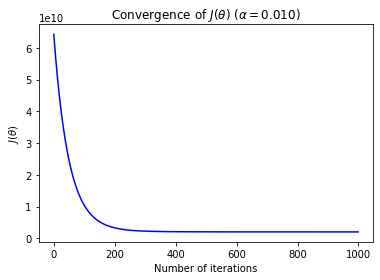

In [16]:
print('Running gradient descent ... ')

# Chose some values
alpha = 0.01
num_iters = 1000

# Init theta and run gradient descent
theta = np.zeros([X.shape[1] + 1, 1])
theta, J_history = gradientDescentMulti(X_norm, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(num_iters), J_history, 'b')
plt.xlabel('Number of iterations')
plt.ylabel(r'$J(\theta)$')
plt.title(r'Convergence of $J(\theta)$ ($\alpha = %.3f$)' % alpha)

# Display gradient descent's result
print('Theta computed from gradient descent: \n', theta)

### 3.3 Normal Equations
In the lecture videos, you learned that the closed-form solution to linear
regression is

\begin{equation}
\theta = (X^TX)^{-1}X^Ty
\end{equation}

Using this formula does not require any feature scaling, and you will get an
exact solution in one calculation: there is no "loop until convergence" like
in gradient descent.

Complete the code for the function `normalEqn` below to use the formula above
to calculate $\theta$.

In [17]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal
    equations.

    Parameters
    ----------
    X : array_like
        The dataset of shape (m, n+1).
    y : array_like
        The value at each data point. A vector of shape (m, ).
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    """
    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    return theta

Solving with normal equations.

In [18]:
X1 = np.c_[np.ones([m, 1]), X]

# Calculate the parameters from the normal equation
theta_ne = normalEqn(X1, y)
print('Theta computed from normal equations: \n', theta_ne)

Theta computed from normal equations: 
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
